# AIA Response Function Tests

In [116]:
import os
import sys
import pickle

import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

import ChiantiPy.core as ch
import sunpy.instr.aia as aia

sns.set_context(context='notebook',font_scale=1.5)
%matplotlib inline

The goal of this notebook is to test the wavelength and temperature response function calculations that are currently being developed in SunPy. 

## Wavelength Response Functions
First, we'll calculate the wavelength response functions for 6 of the 7 AIA EUV channels: 171, 193, 131, 335, 211, and 94 $\mathrm{\mathring{A}}$.

In [106]:
euv_channels = [171,131,193,335,211,94]
channel_colors = {'94':'red','131':'royal blue','171':'yellow','193':'bright green','211':'hot pink','335':'cyan'}

In [107]:
wavelength_response_fns = {}

In [108]:
response = aia.Response(euv_channels,path_to_genx_dir='../ssw_aia_response_data/')

In [120]:
for c in euv_channels:
    response.calculate_wavelength_response(c,use_genx_values=True)
    channel_data = response.get_channel_data(c)
    wavelength_response_fns[str(c)] = {'response':response.wavelength_response,
                                       'wavelength':np.arange(0,channel_data['number_wavelength_intervals'])*channel_data['wavelength_interval']+channel_data['minimum_wavelength']}

Make a plot of each of these response functions.

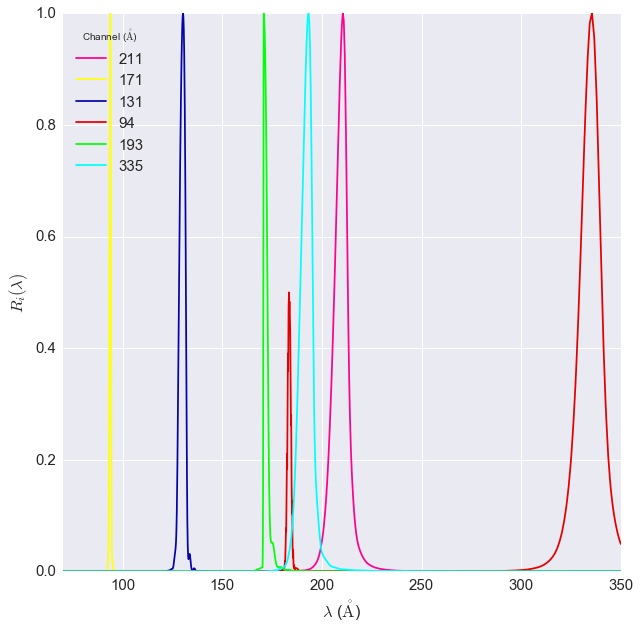

In [121]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
for channel in wavelength_response_fns.items():
    ax.plot(channel[1]['wavelength'],(channel[1]['response'])/np.max(channel[1]['response']),label=str(channel[0]),
           color=sns.xkcd_rgb[channel_colors[str(channel[0])]])
ax.set_xlim([70,350])
ax.set_xlabel(r'$\lambda$ ($\mathrm{\mathring{A}}$)')
ax.set_ylabel(r'$R_i(\lambda)$')
ax.legend(loc='best',title=r'Channel ($\mathrm{\mathring{A}}$)')

## Contribution Functions, $G(n,T)$

Next, we'll calculate the contribution functions for a couple of ions, hopefully ones that are relatively important to each channel. According to the [AIA LMSAL webpage](http://aia.lmsal.com/public/instrument.htm),

| Channel ($\mathrm{\mathring{A}}$) | Primary Ions | Characteristic Temperature, $\log{T}$ (K) |
|:-------:|:--------------:|:------------------------------:|
| 94  | Fe XVII | 6.8 |
| 131 | Fe VIII, XX, XXIII | 5.6, 7.0, 7.2 |
| 171 | Fe IX | 5.8 |
| 193 | Fe XII, XXIV | 6.1, 7.3 |
| 211 | Fe XIV | 6.3 |
| 335 | Fe XVI | 6.4 |

First, choose a temperature range and constant density.

In [25]:
temperature = np.logspace(5.,8.,50)
density = 1.e+9
#all wavelength arrays are the same
wvl = wavelength_response_fns['94']['wavelength']

Now, make a list of all the ions that we care about so that we can easily iterate through them.

In [26]:
ions = ['fe_8','fe_9','fe_12','fe_14','fe_16','fe_17','fe_20','fe_23','fe_24']
search_interval = np.array([-2.5,2.5])
ion_wvl_ranges = [c+search_interval for c in [131.,171.,193.,211.,335.,94.,131.,131.,193.]]

Finally, iterate through all of the ions and store the contribution function and associated information.

 ndens =     1 ntemp =    50
 - make a selection from these - 
     0     130.9410    1   64 3s2 3p6 3d 2D1.5 - 3s2 3p6 4f 2F2.5 
     1     131.2400    2   65 3s2 3p6 3d 2D2.5 - 3s2 3p6 4f 2F3.5 
     2     131.2570    2   64 3s2 3p6 3d 2D2.5 - 3s2 3p6 4f 2F2.5 
 type the comma-separated index/indices of your selection
>>> '0'


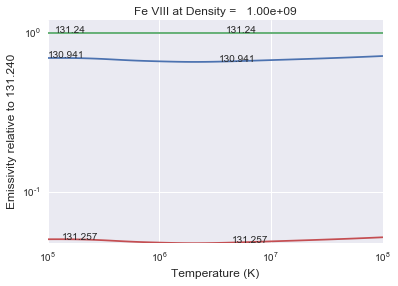

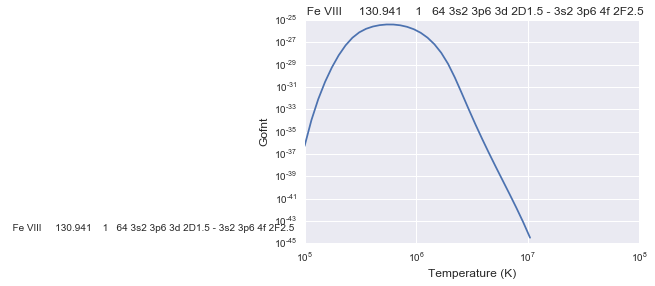

 ndens =     1 ntemp =    50
 - make a selection from these - 
     0     170.5250   12  133 3s2 3p5 3d 1F3.0 - 3s2 3p4 3d2 1F3.0 
     1     171.0730    1   13 3s2 3p6 1S0.0 - 3s2 3p5 3d 1P1.0 
     2     171.6220    4  115 3s2 3p5 3d 3P2.0 - 3s2 3p4 3d2 3P2.0 
 type the comma-separated index/indices of your selection
>>> '0'


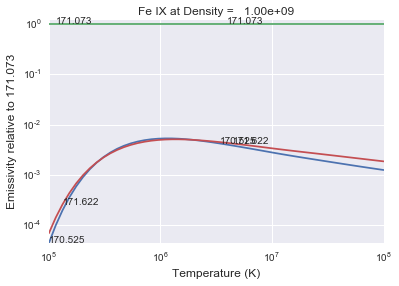

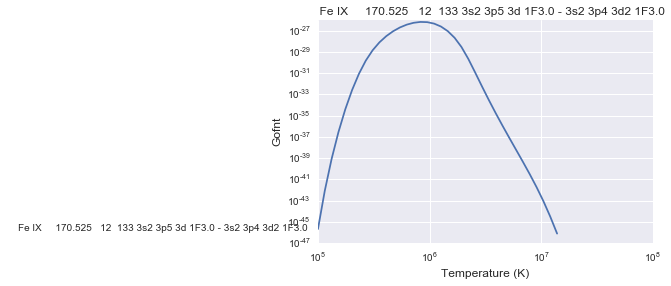

 ndens =     1 ntemp =    50
 - make a selection from these - 
     0     192.3940    1   30 3s2 3p3 4S1.5 - 3s2 3p2 3d 4P0.5 
     1     193.5090    1   29 3s2 3p3 4S1.5 - 3s2 3p2 3d 4P1.5 
     2     195.1190    1   27 3s2 3p3 4S1.5 - 3s2 3p2 3d 4P2.5 
 type the comma-separated index/indices of your selection
>>> '1'


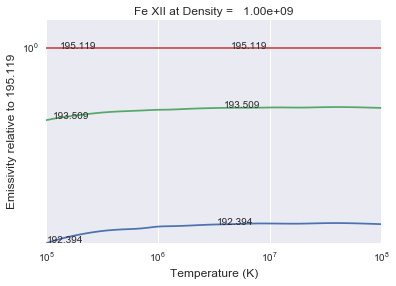

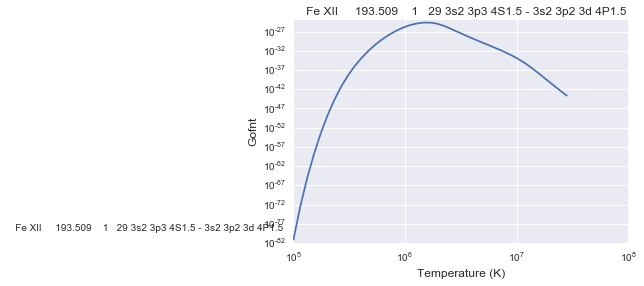

 ndens =     1 ntemp =    50
 - make a selection from these - 
     0     211.3172    1   11 3s2.3p 2P0.5 - 3s2.3d 2D1.5 
     1     212.1255    4   27 3s.3p2 4P1.5 - 3s.3p(3P).3d 4P1.5 
     2     213.1955    3   24 3s.3p2 4P0.5 - 3s.3p(3P).3d 4D0.5 
 type the comma-separated index/indices of your selection
>>> '0'


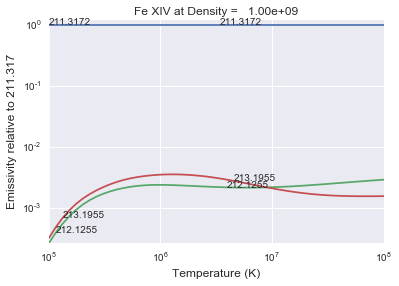

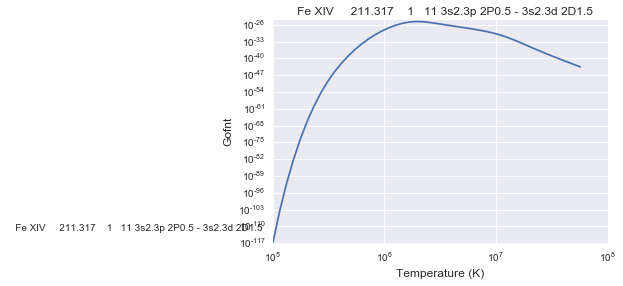

 ndens =     1 ntemp =    50
 - make a selection from these - 
     0     335.4090    1    3 3s 2S0.5 - 3p 2P1.5 
     1     335.5820   45   66 2p5 3s 3p 4P0.5 - 2p5 3s 3d 4P1.5 
     2     335.6390   37   55 2p5 3s 3p 4D3.5 - 2p5 3p2 4P2.5 
 type the comma-separated index/indices of your selection
>>> '0'


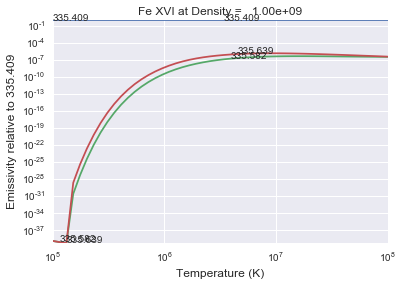

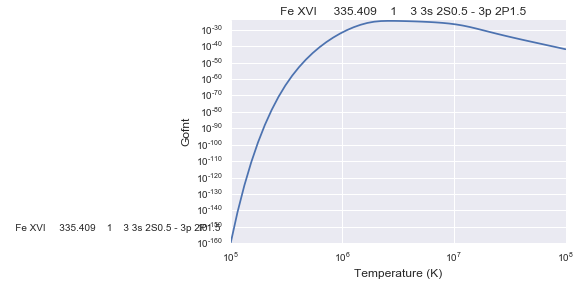

/Users/willbarnes/anaconda/envs/gsoc3/lib/python3.5/site-packages/ChiantiPy-0.7.0-py3.5.egg/ChiantiPy/tools/io.py:159: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ntemp = np.zeros(ntrans, 'int32')
/Users/willbarnes/anaconda/envs/gsoc3/lib/python3.5/site-packages/ChiantiPy-0.7.0-py3.5.egg/ChiantiPy/tools/io.py:167: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  temp = np.zeros((ntrans,maxNtemp), 'float64')
/Users/willbarnes/anaconda/envs/gsoc3/lib/python3.5/site-packages/ChiantiPy-0.7.0-py3.5.egg/ChiantiPy/tools/io.py:180: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  lvl1 = np.zeros(ntrans, 'int64')
/Users/willbarnes/anaconda/envs/gsoc3/lib/python3.5/site-packages/ChiantiPy-0.7.0-py3.5.egg/ChiantiPy/tools/io.py:181: VisibleDeprecationWarning: using a non-integer number instead o

 ndens =     1 ntemp =    50
 - make a selection from these - 
     0      91.5500   21   37 2s2.2p5.3d 1D2.0 - 2s.2p6.3d 1D2.0 
     1      91.6470   19   36 2s2.2p5.3d 3F4.0 - 2s.2p6.3d 3D3.0 
     2      92.2710   22   37 2s2.2p5.3d 3D3.0 - 2s.2p6.3d 1D2.0 
 type the comma-separated index/indices of your selection
>>> '1'


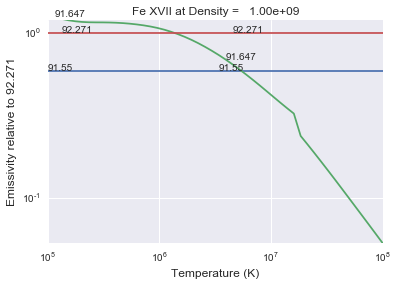

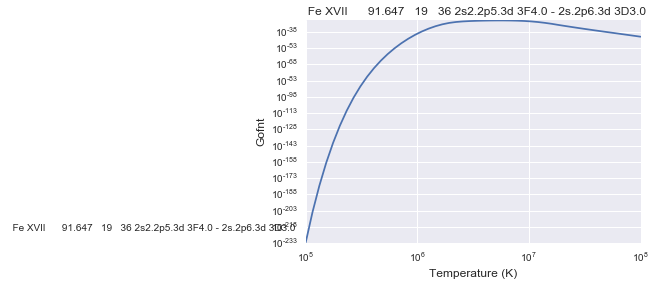

 ndens =     1 ntemp =    50
 - make a selection from these - 
     0     131.2146   61  174 2s2.2p2(3P).3d 2F3.5 - 2s.2p3(3P).3d 4F4.5 
     1     131.6887   11   14 2s.2p4 2S0.5 - 2p5 2P1.5 
     2     132.8405    1    6 2s2.2p3 4S1.5 - 2s.2p4 4P2.5 
 type the comma-separated index/indices of your selection
>>> '1'


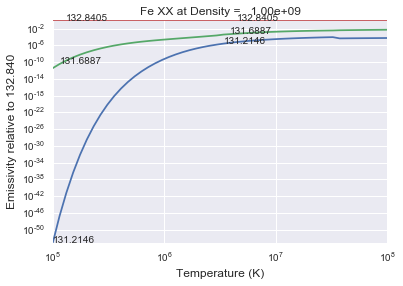

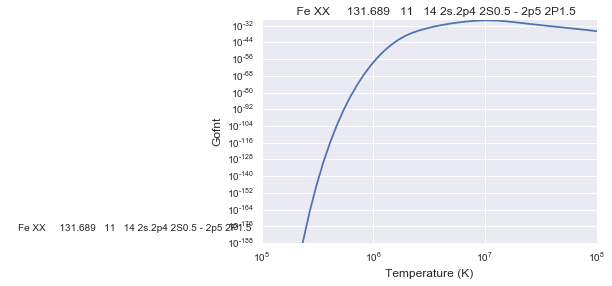

 ndens =     1 ntemp =    50
 - make a selection from these - 
     0     130.5325   85  104 2p.4p 1S0.0 - 2s.5p 1P1.0 
     1     132.1923   85  102 2p.4p 1S0.0 - 2s.5p 3P1.0 
     2     132.9065    1    5 2s2 1S0.0 - 2s.2p 1P1.0 
 type the comma-separated index/indices of your selection
>>> '2'


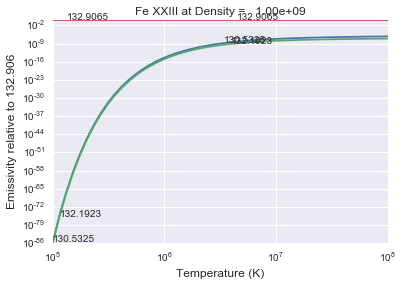

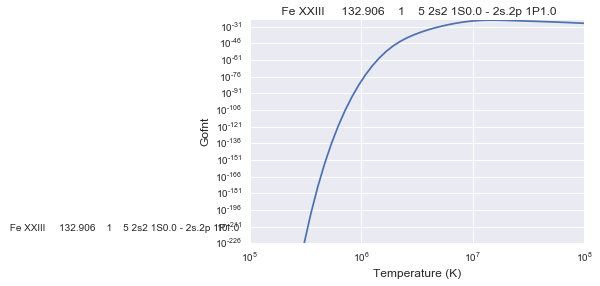

 ndens =     1 ntemp =    50
 - make a selection from these - 
     0     190.6578   71   79 1s.2s(3S).2p 2P0.5 - 1s.2p2(1S) 2S0.5 
     1     192.0281    1    3 1s2.2s 2S0.5 - 1s2.2p 2P1.5 
 type the comma-separated index/indices of your selection
>>> '1'


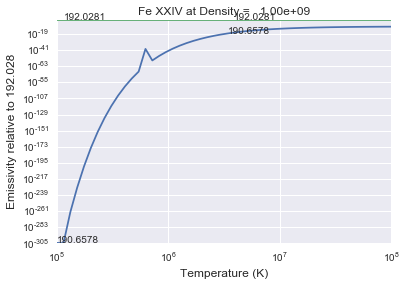

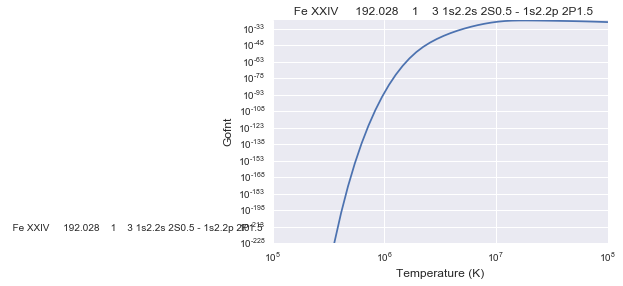

In [29]:
#warning! This takes a long time!
if os.path.isfile('gofnt.pickle'):
    print('Loading G(n,T) from file to save time.')
    with open('gofnt.pickle','rb') as f:
        contribution_fns = pickle.load(f)
else:
    contribution_fns = {}
    for i,iwr in zip(ions,ion_wvl_ranges):
        tmp_ion = ch.ion(i,temperature=temperature,eDensity=density,em=1.e+27)
        tmp_ion.gofnt(wvlRange=[iwr[0],iwr[1]],top=3)
        plt.show()
        contribution_fns[i] = tmp_ion.Gofnt

In [117]:
if not os.path.isfile('gofnt.pickle'):
    print('Writing G(n,T) to file for loading in later.')
    with open('gofnt.pickle','wb') as f:
        pickle.dump(contribution_fns,f)

## Calculating Temperature Response Functions
From Boerner et al. (2012), the temperature response function $K_i(T)$ is given by
$$
K_i(T)=\int_0^{\infty}\mathrm{d}\lambda\,G(\lambda,T)R_i(\lambda)
$$
First, we need to reshape the contribution functions for our discrete number of ions into $G(\lambda,T)$ such that each column of $G$ is $G_{\lambda}(T)$. Then we can interpolate each $R_i$ over that discrete number of wavelengths.

In [122]:
sorted_g = sorted([g[1] for g in contribution_fns.items()],key=lambda x: x['wvl'])
g_matrix = np.vstack((g['gofnt'] for g in sorted_g)).T
discrete_wavelengths = np.array([g['wvl'] for g in sorted_g])

In [123]:
for key in wavelength_response_fns:
    wavelength_response_fns[key]['wavelength_interpolated'] = discrete_wavelengths[:,0]
    wavelength_response_fns[key]['response_interpolated'] = np.interp(discrete_wavelengths,
                                                                      wavelength_response_fns[key]['wavelength'],
                                                                      wavelength_response_fns[key]['response'])[:,0]

In [124]:
temperature_response = {}
for key in wavelength_response_fns:
    g_times_r = g_matrix*wavelength_response_fns[key]['response_interpolated']
    temperature_response[key] = np.trapz(g_times_r,
                                         wavelength_response_fns[key]['wavelength_interpolated'])

Finally, try to plot all of the temperature response functions.

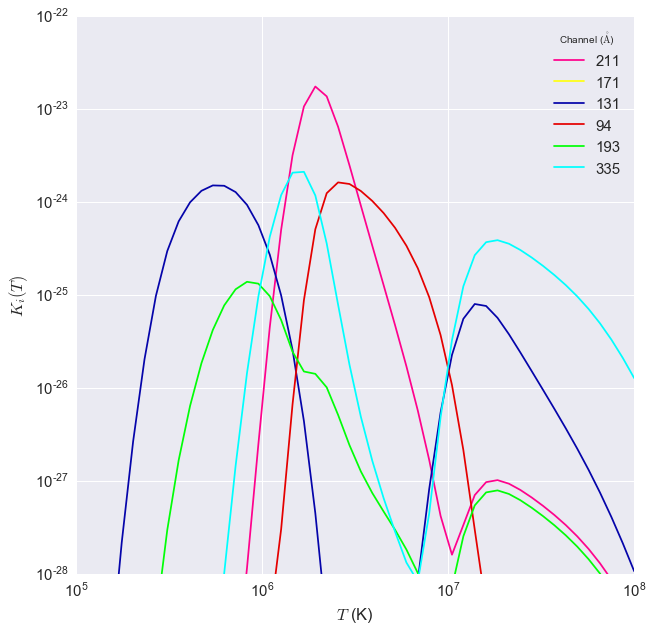

In [125]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
for tresp in temperature_response.items():
    ax.plot(temperature,tresp[1],label=str(tresp[0]),color=sns.xkcd_rgb[channel_colors[tresp[0]]])
ax.set_ylim([1e-28,1e-22])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$T$ (K)')
ax.set_ylabel(r'$K_i(T)$')
ax.legend(loc='best',title=r'Channel ($\mathrm{\mathring{A}}$)')

Compare this to the top panel of Fig. 11 in Boerner et al. (2012)